In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import PandasTools

In [6]:
df = pd.read_csv("dataset.csv",sep="\t")

In [7]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,label,pIC50
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,IC50,'=',7.079458e+16,nM,0,-7.85
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,IC50,'=',5.888437e+15,nM,0,-6.77
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,IC50,'=',4.570882e+15,nM,0,-6.66
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,IC50,'=',3.235937e+15,nM,0,-6.51
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,IC50,'=',5.370318e+14,nM,0,-5.73


+ We need to standardize (clean up) the structures. Previously we used molvs, now we use rdMolStandardize implemented in rdkit. 

+ More information about this tool can be found here "https://github.com/rdkit/rdkit/blob/master/Docs/Notebooks/MolStandardize.ipynb"

In [8]:
sm = "CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C"

rdMolStandardize.StandardizeSmiles(sm)

'CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C'

In [9]:
rdMolStandardize.ValidateSmiles(sm)

[]

In [10]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="Smiles")

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,label,pIC50,ROMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,IC50,'=',7.079458e+16,nM,0,-7.85,
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,IC50,'=',5.888437e+15,nM,0,-6.77,
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,IC50,'=',4.570882e+15,nM,0,-6.66,
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,IC50,'=',3.235937e+15,nM,0,-6.51,
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,IC50,'=',5.370318e+14,nM,0,-5.73,

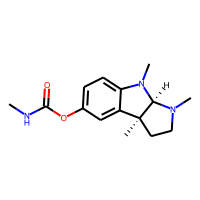
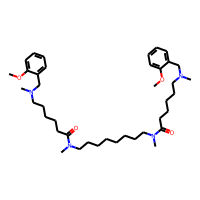
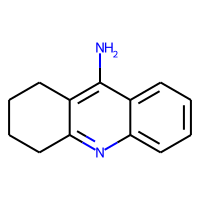
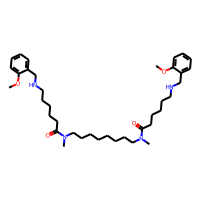
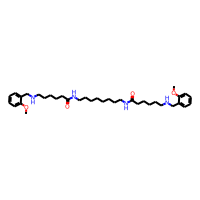

In [11]:
df.head()

In [12]:
from molvs import Standardizer

In [13]:
s = Standardizer()

In [14]:
df["mol"] = [s.standardize(m) for m in df["ROMol"]] 

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,label,pIC50,ROMol,mol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,IC50,'=',7.079458e+16,nM,0,-7.85,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,IC50,'=',5.888437e+15,nM,0,-6.77,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,IC50,'=',4.570882e+15,nM,0,-6.66,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,IC50,'=',3.235937e+15,nM,0,-6.51,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,IC50,'=',5.370318e+14,nM,0,-5.73,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

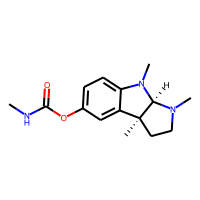
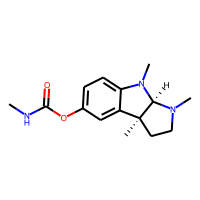
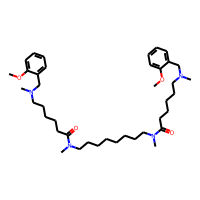
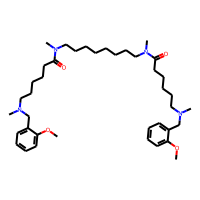
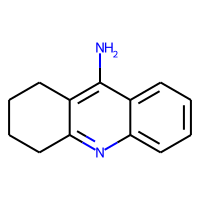
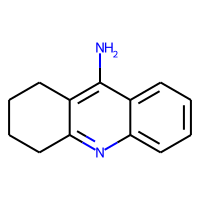
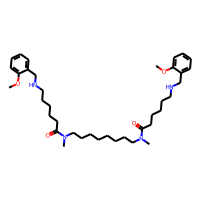
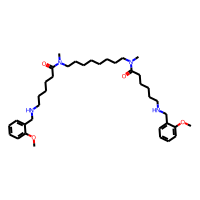
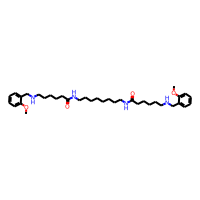
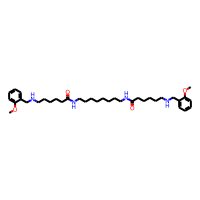

In [15]:
df.head()

In [16]:
df["smiles"] = [Chem.MolToSmiles(m) for m in df["mol"]]

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,label,pIC50,ROMol,mol,smiles
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,IC50,'=',7.079458e+16,nM,0,-7.85,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,IC50,'=',5.888437e+15,nM,0,-6.77,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,IC50,'=',4.570882e+15,nM,0,-6.66,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",Nc1c2c(nc3ccccc13)CCCC2
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,IC50,'=',3.235937e+15,nM,0,-6.51,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,IC50,'=',5.370318e+14,nM,0,-5.73,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...

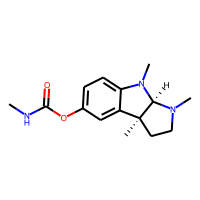
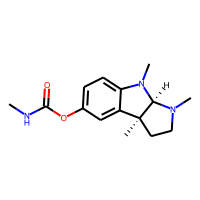
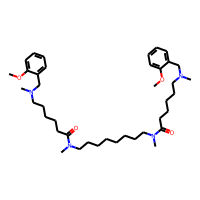
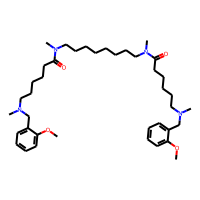
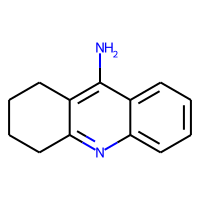
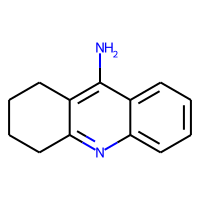
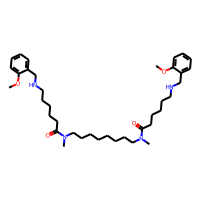
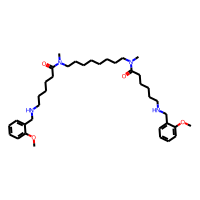
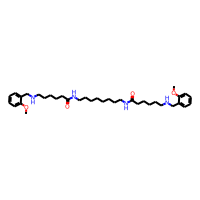
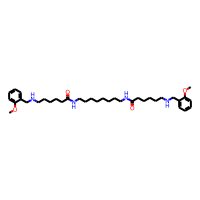

In [17]:
df.head()

In [18]:
df.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'label', 'pIC50', 'ROMol', 'mol',
       'smiles'],
      dtype='object')

In [19]:
df = df[['Molecule ChEMBL ID','smiles','label',"pIC50"]]

In [20]:
df.head()

,Molecule ChEMBL ID,smiles,label,pIC50
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0,-7.85
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,0,-6.77
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,0,-6.66
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,0,-6.51
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,0,-5.73


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  5004 non-null   object 
 1   smiles              5004 non-null   object 
 2   label               5004 non-null   int64  
 3   pIC50               5004 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 156.5+ KB


In [33]:
df.to_csv("dataset_std.csv",index=None,sep="\t")

+ Next we calculate some descriptors to gain insight into chemical space of molecules.

In [22]:
from rdkit.Chem import Descriptors

In [23]:
df.head()

,Molecule ChEMBL ID,smiles,label,pIC50
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0,-7.85
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,0,-6.77
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,0,-6.66
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,0,-6.51
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,0,-5.73


In [24]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="smiles")

,Molecule ChEMBL ID,smiles,label,pIC50,ROMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0,-7.85,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,0,-6.77,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,0,-6.66,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,0,-6.51,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,0,-5.73,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

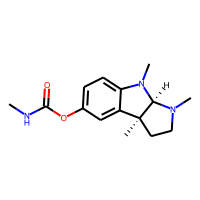
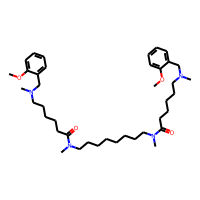
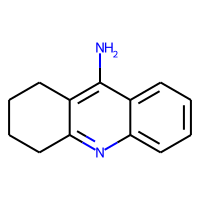
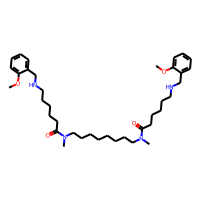
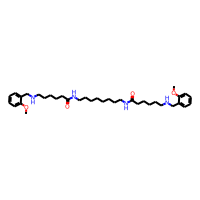

In [25]:
df.head()

In [26]:
df["Molwt"] = df["ROMol"].apply(Descriptors.MolWt)
df["LogP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)





,Molecule ChEMBL ID,smiles,label,pIC50,ROMol,Molwt,LogP,HBA,HBD
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0,-7.85,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",275.352,1.7739,4,1
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,0,-6.77,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",666.992,7.6458,6,0
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,0,-6.66,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",198.269,2.6958,2,1
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,0,-6.51,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",638.938,6.9614,6,2
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,0,-5.73,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",610.884,6.2770,6,4

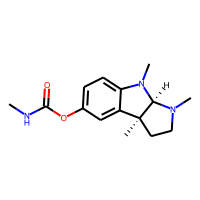
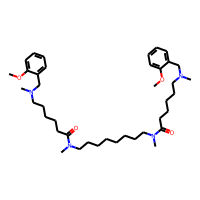
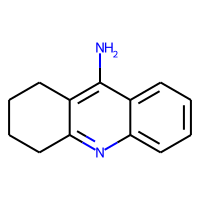
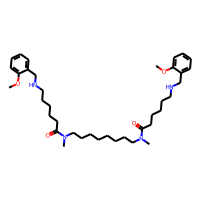
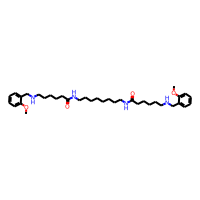

In [27]:
df.head()

In [28]:
df.drop("ROMol",axis=1,inplace=True)

In [29]:
df.head()

,Molecule ChEMBL ID,smiles,label,pIC50,Molwt,LogP,HBA,HBD
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0,-7.85,275.352,1.7739,4,1
1,CHEMBL11805,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,0,-6.77,666.992,7.6458,6,0
2,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,0,-6.66,198.269,2.6958,2,1
3,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,0,-6.51,638.938,6.9614,6,2
4,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,0,-5.73,610.884,6.2770,6,4


<AxesSubplot:xlabel='Molwt', ylabel='LogP'>

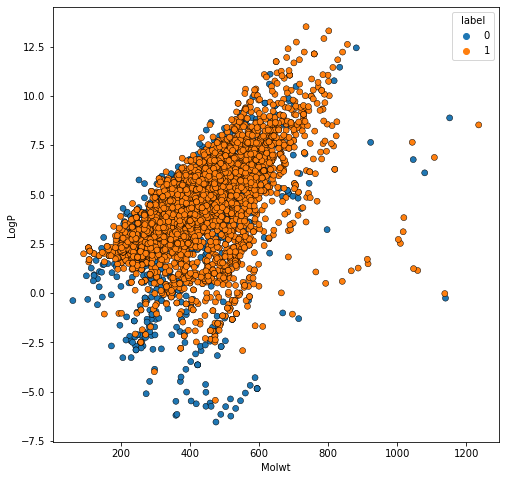

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df["Molwt"],y=df["LogP"],hue=df["label"],edgecolor="black")

<AxesSubplot:xlabel='label', ylabel='Molwt'>

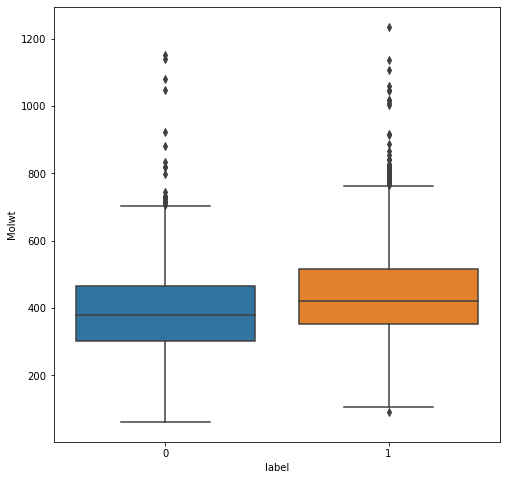

In [57]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["Molwt"])

<AxesSubplot:xlabel='label', ylabel='LogP'>

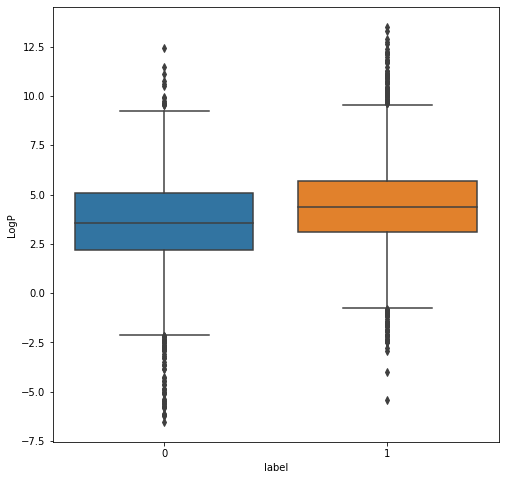

In [58]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["LogP"])

<AxesSubplot:xlabel='label', ylabel='HBA'>

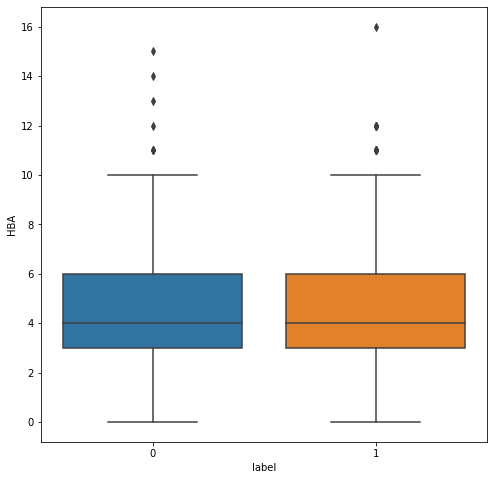

In [59]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["HBA"])

<AxesSubplot:xlabel='label', ylabel='HBD'>

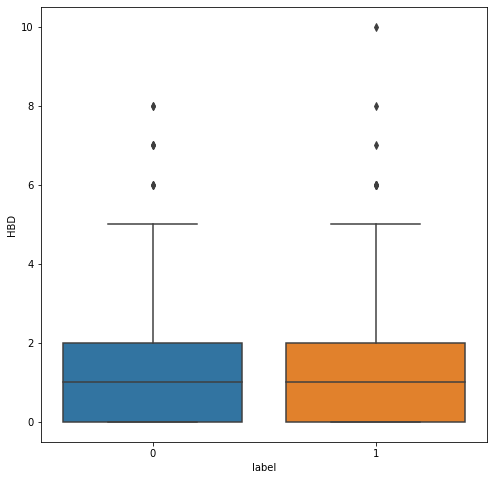

In [60]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["HBD"])

In [31]:
df.columns

Index(['Molecule ChEMBL ID', 'smiles', 'label', 'pIC50', 'Molwt', 'LogP',
       'HBA', 'HBD'],
      dtype='object')

In [32]:
X = df[['Molwt', 'LogP',
       'HBA', 'HBD']]

In [33]:
y = df["label"]

In [34]:
from kennard_stone import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)